<b>PISA DATASET ANALYSIS

by Stella Karagianni

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
from sklearn.linear_model import LinearRegression
from scipy.stats import kstest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<b>DATASET INFORMATION

In [26]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")

In [6]:
pisa_df

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...,...
2082,2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.000
2084,2084,LTU,PISASCIENCE,TOT,2018,482.000
2085,2085,LTU,PISASCIENCE,BOY,2018,479.000


In [8]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      2087 non-null   int64  
 1   LOCATION   2087 non-null   object 
 2   INDICATOR  2087 non-null   object 
 3   SUBJECT    2087 non-null   object 
 4   TIME       2087 non-null   int64  
 5   Value      2087 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 98.0+ KB


<b>DATASET NORMALITY

(array([ 12.,  62.,  94.,  80., 130., 319., 703., 500., 160.,  27.]),
 array([348. , 370.6, 393.2, 415.8, 438.4, 461. , 483.6, 506.2, 528.8,
        551.4, 574. ]),
 <BarContainer object of 10 artists>)

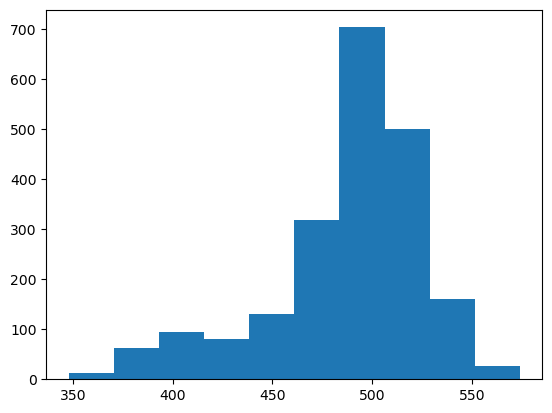

In [29]:
plt.hist(pisa_df.Value)

<b> COUNTRIES PLOTS

In [469]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")
loc = pd.value_counts(pisa_df['LOCATION'])
loc

LOCATION
AUS     54
IRL     54
SWE     54
BRA     54
PRT     54
POL     54
NOR     54
NZL     54
IDN     54
MEX     54
KOR     54
JPN     54
ITA     54
ISL     54
HUN     54
GRC     54
DEU     54
FRA     54
FIN     54
DNK     54
CZE     54
CAN     54
BEL     54
CHE     54
LUX     53
TUR     51
USA     51
SVK     51
ESP     51
NLD     51
OAVG    49
CHL     48
ISR     48
RUS     47
SVN     45
GBR     45
EST     45
AUT     45
LVA     30
COL     18
SGP      9
HKG      9
PER      9
TWN      9
MAC      9
CRI      9
LTU      9
Name: count, dtype: int64

Text(0.5, 1.0, 'Countries attendance at PISA')

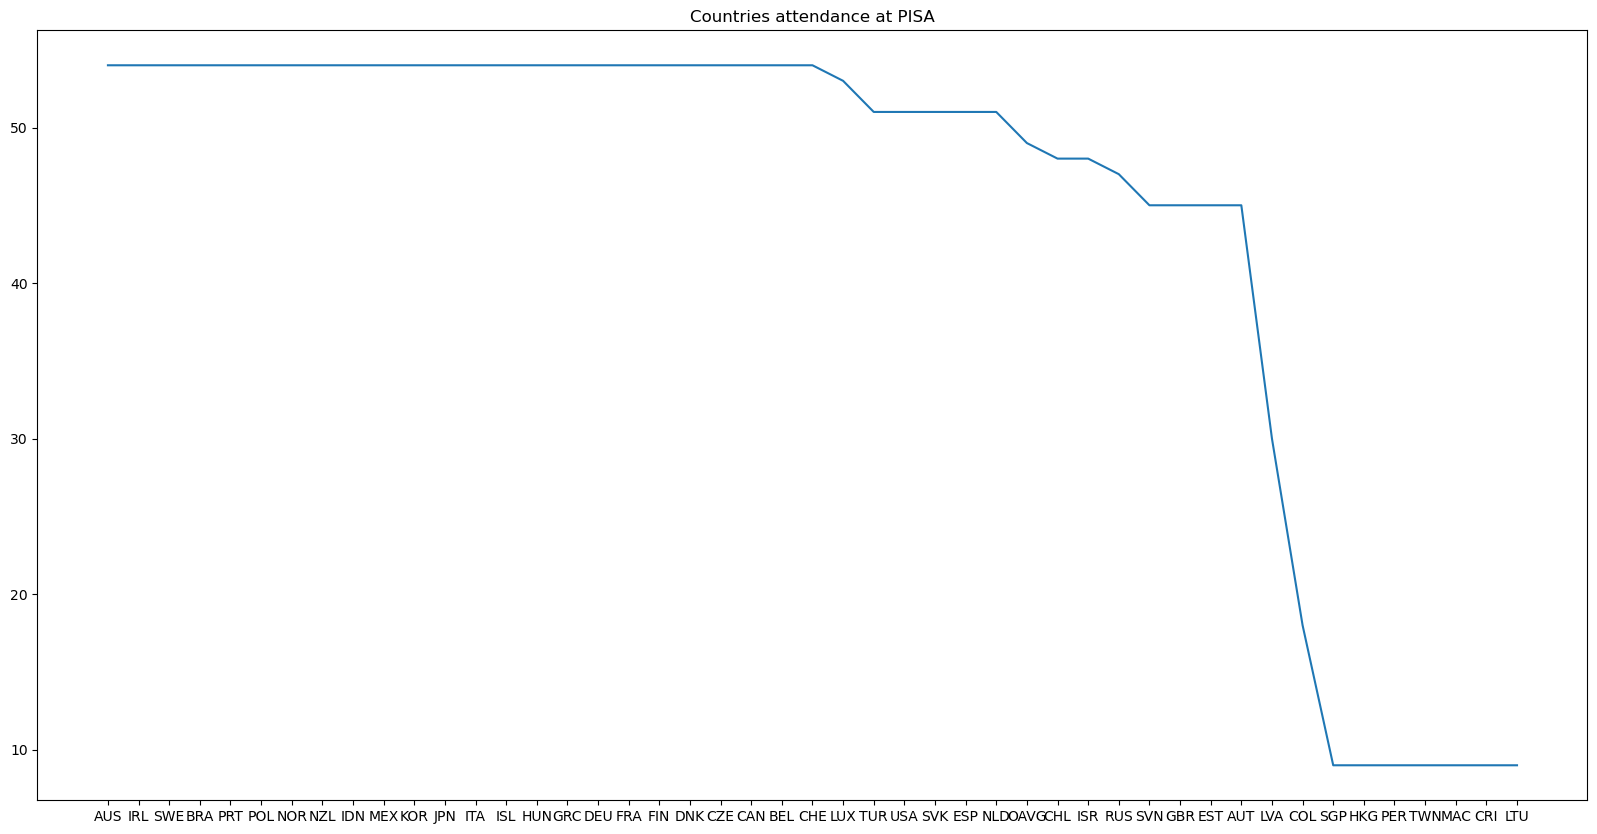

In [525]:
plt.figure(figsize = [20,10])
plt.plot(loc)
plt.title('Countries attendance at PISA')

In [531]:
countries_size = pisa_df.groupby('LOCATION').size().reset_index(name='counts')

<Axes: xlabel='counts', ylabel='LOCATION'>

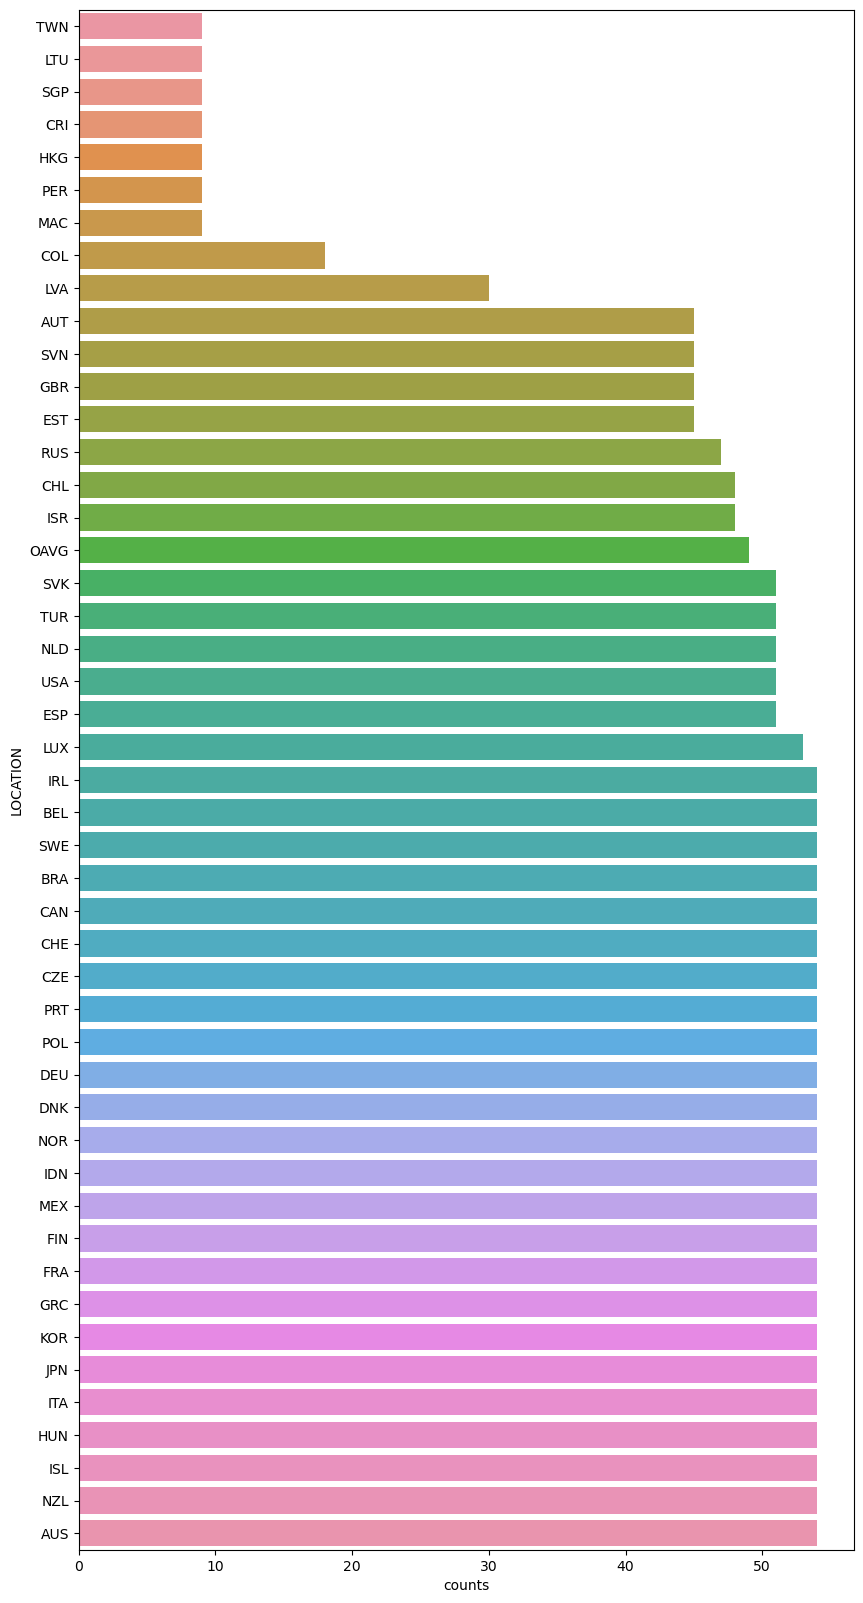

In [535]:
countries_size.sort_values(by='counts', inplace=True)
plt.figure(figsize = [10,20])
sb.barplot(x=countries_size.counts, y=countries_size.LOCATION, data=countries_size)

<b>BOYS VS GIRLS RESULTS

In [29]:
pisa_boys = pisa_df[pisa_df['SUBJECT'] == 'BOY']
pisa_boys

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...,...
2072,2072,PER,PISASCIENCE,BOY,2015,402.000
2076,2076,TWN,PISASCIENCE,BOY,2015,535.000
2079,2079,MAC,PISASCIENCE,BOY,2015,525.000
2082,2082,CRI,PISASCIENCE,BOY,2018,420.000


In [31]:
pisa_girls = pisa_df[pisa_df['SUBJECT'] == 'GIRL']
pisa_girls

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
6,6,AUS,PISAMATH,GIRL,2003,522.000
7,7,AUS,PISAMATH,GIRL,2006,513.000
8,8,AUS,PISAMATH,GIRL,2009,509.000
9,9,AUS,PISAMATH,GIRL,2012,497.821
10,10,AUS,PISAMATH,GIRL,2015,491.000
...,...,...,...,...,...,...
2073,2073,PER,PISASCIENCE,GIRL,2015,392.000
2077,2077,TWN,PISASCIENCE,GIRL,2015,530.000
2080,2080,MAC,PISASCIENCE,GIRL,2015,532.000
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.000


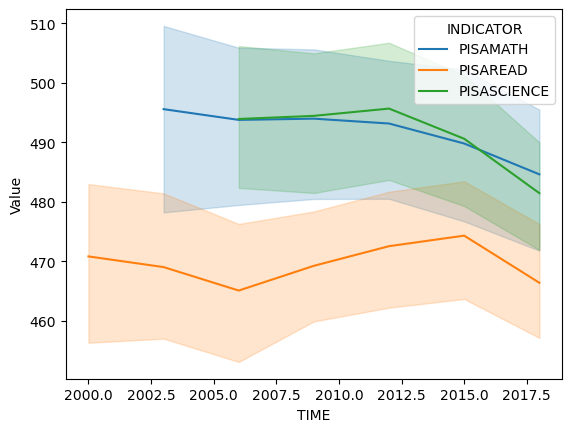

In [33]:
sb.lineplot(x='TIME', y='Value', data=pisa_boys, hue='INDICATOR')
plt.show()

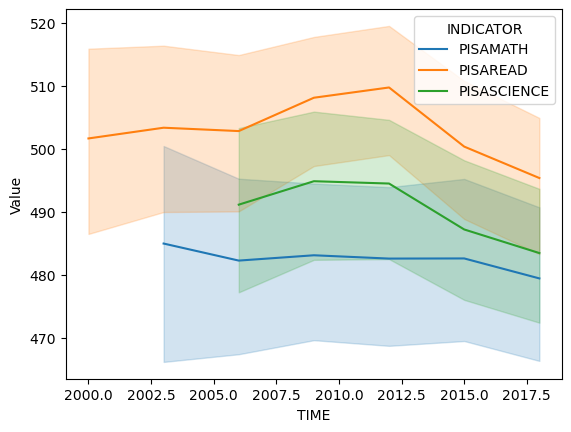

In [35]:
sb.lineplot(x='TIME', y='Value', data=pisa_girls, hue='INDICATOR')
plt.show()

<b>DIFFERENCES IN MATH, READ & SCIENCE AMONG GENDERS

In [74]:
gender = pisa_df.groupby(by=['SUBJECT', 'INDICATOR']).agg({'Value' : 'mean'})
gender.reset_index(inplace=True)
gender

,SUBJECT,INDICATOR,Value
0,BOY,PISAMATH,491.511651
1,BOY,PISAREAD,469.715347
2,BOY,PISASCIENCE,490.949764
3,GIRL,PISAMATH,482.384310
4,GIRL,PISAREAD,502.906630
5,GIRL,PISASCIENCE,489.957950
6,TOT,PISAMATH,486.792373
7,TOT,PISAREAD,485.866920
8,TOT,PISASCIENCE,490.480198


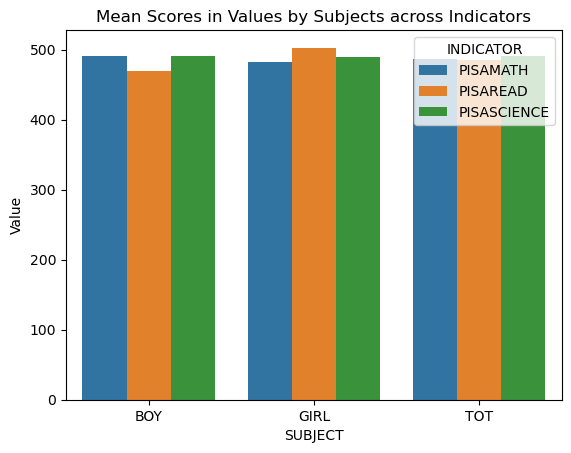

In [77]:
sb.barplot(x='SUBJECT', y='Value', data=gender, hue='INDICATOR')
plt.title("Mean Scores in Values by Subjects across Indicators")
plt.show()

In [83]:
gender2 = pisa_df.groupby(by=['SUBJECT', 'INDICATOR']).agg({'Value' : 'max'})
gender2.reset_index(inplace=True)
gender2

,SUBJECT,INDICATOR,Value
0,BOY,PISAMATH,564.0
1,BOY,PISAREAD,539.0
2,BOY,PISASCIENCE,562.0
3,GIRL,PISAMATH,564.0
4,GIRL,PISAREAD,574.0
5,GIRL,PISASCIENCE,565.0
6,TOT,PISAMATH,564.0
7,TOT,PISAREAD,556.0
8,TOT,PISASCIENCE,563.0


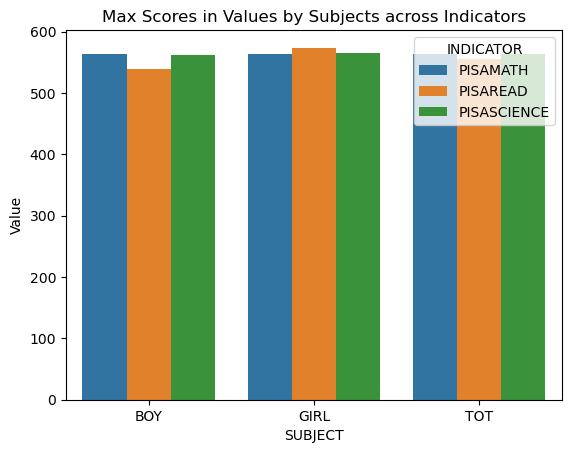

In [85]:
sb.barplot(x='SUBJECT', y='Value', data=gender2, hue='INDICATOR')
plt.title("Max Scores in Values by Subjects across Indicators")
plt.show()

<b>TOP COUNTRIES BY BEST VALUE

In [89]:
country = pisa_df.groupby(by='LOCATION').agg({'Value' : 'mean'})
top_countries = country.sort_values(by='Value', ascending=False)
top_countries.reset_index(inplace=True)
top_countries

,LOCATION,Value
0,SGP,551.666667
1,FIN,534.937389
2,KOR,533.144759
3,HKG,532.777778
4,MAC,527.222222
5,JPN,525.706352
6,CAN,525.190241
7,TWN,523.888889
8,EST,521.068467
9,NZL,515.193907


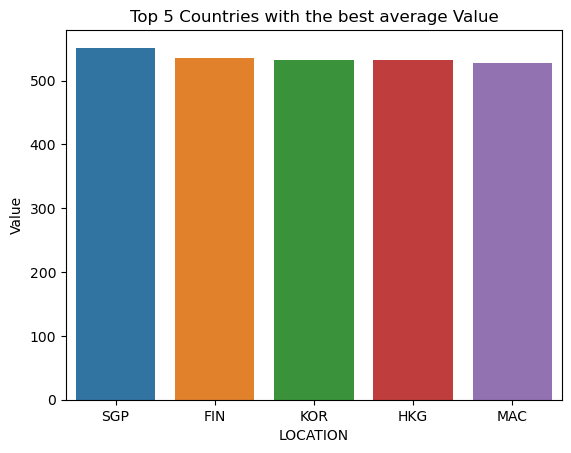

In [92]:
top5 = top_countries.head(5)
sb.barplot(x='LOCATION', y='Value', data=top5)
plt.title("Top 5 Countries with the best average Value")
plt.show()

<b>GREECE'S RESULTS ACROSS TIME

In [96]:
pisa_gr = pisa_df[pisa_df['LOCATION'] == 'GRC']
pisa_gr

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
106,106,GRC,PISAMATH,BOY,2003,455.000
107,107,GRC,PISAMATH,BOY,2006,462.000
108,108,GRC,PISAMATH,BOY,2009,473.000
109,109,GRC,PISAMATH,BOY,2012,457.039
110,110,GRC,PISAMATH,BOY,2015,454.000
111,111,GRC,PISAMATH,BOY,2018,452.000
112,112,GRC,PISAMATH,GIRL,2003,436.000
113,113,GRC,PISAMATH,GIRL,2006,457.000
114,114,GRC,PISAMATH,GIRL,2009,459.000
115,115,GRC,PISAMATH,GIRL,2012,448.984


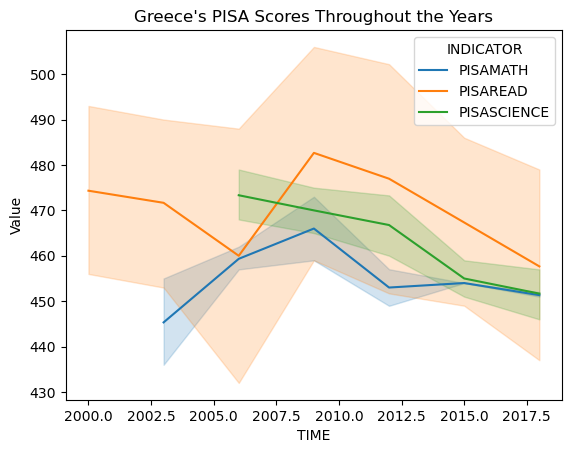

In [99]:
sb.lineplot(x='TIME', y='Value', data=pisa_gr, hue='INDICATOR')
plt.title("Greece's PISA Scores Throughout the Years")
plt.show()

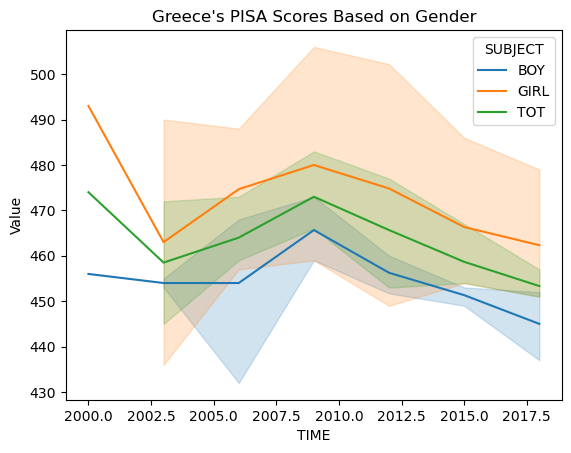

In [102]:
sb.lineplot(x='TIME', y='Value', data=pisa_gr, hue='SUBJECT')
plt.title("Greece's PISA Scores Based on Gender")
plt.show()

<b>PISA RESULTS 2000 VS 2018

In [108]:
pisa00 = pisa_df[pisa_df['TIME'] == 2000]
pisa00

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
700,700,AUS,PISAREAD,BOY,2000,513.0
707,707,AUS,PISAREAD,GIRL,2000,546.0
714,714,AUT,PISAREAD,BOY,2000,476.0
720,720,AUT,PISAREAD,GIRL,2000,509.0
726,726,BEL,PISAREAD,BOY,2000,492.0
...,...,...,...,...,...,...
1414,1414,CHL,PISAREAD,TOT,2000,410.0
1425,1425,IDN,PISAREAD,TOT,2000,371.0
1432,1432,ISR,PISAREAD,TOT,2000,452.0
1438,1438,LVA,PISAREAD,TOT,2000,458.0


In [111]:
country00 = pisa00.groupby(by='LOCATION').agg({'Value' : 'mean'})
top00 = country00.sort_values(by='Value', ascending=False)
top00.reset_index(inplace=True)
top00

,LOCATION,Value
0,FIN,545.666667
1,CAN,534.666667
2,NZL,529.666667
3,AUS,529.000000
4,IRL,527.333333
5,KOR,525.666667
6,JPN,522.000000
7,SWE,517.000000
8,BEL,508.000000
9,ISL,507.666667


In [114]:
pisa18 = pisa_df[pisa_df['TIME'] == 2018]
pisa18

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
5,5,AUS,PISAMATH,BOY,2018,494.0
11,11,AUS,PISAMATH,GIRL,2018,488.0
16,16,AUT,PISAMATH,BOY,2018,505.0
21,21,AUT,PISAMATH,GIRL,2018,492.0
27,27,BEL,PISAMATH,BOY,2018,514.0
...,...,...,...,...,...,...
2082,2082,CRI,PISASCIENCE,BOY,2018,420.0
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.0
2084,2084,LTU,PISASCIENCE,TOT,2018,482.0
2085,2085,LTU,PISASCIENCE,BOY,2018,479.0


In [117]:
country18 = pisa18.groupby(by='LOCATION').agg({'Value' : 'mean'})
top18 = country18.sort_values(by='Value', ascending=False)
top18.reset_index(inplace=True)
top18

,LOCATION,Value
0,EST,525.555556
1,JPN,520.000000
2,KOR,519.777778
3,CAN,516.777778
4,FIN,516.444444
5,POL,512.777778
6,IRL,504.666667
7,SVN,503.888889
8,GBR,503.555556
9,NZL,502.777778


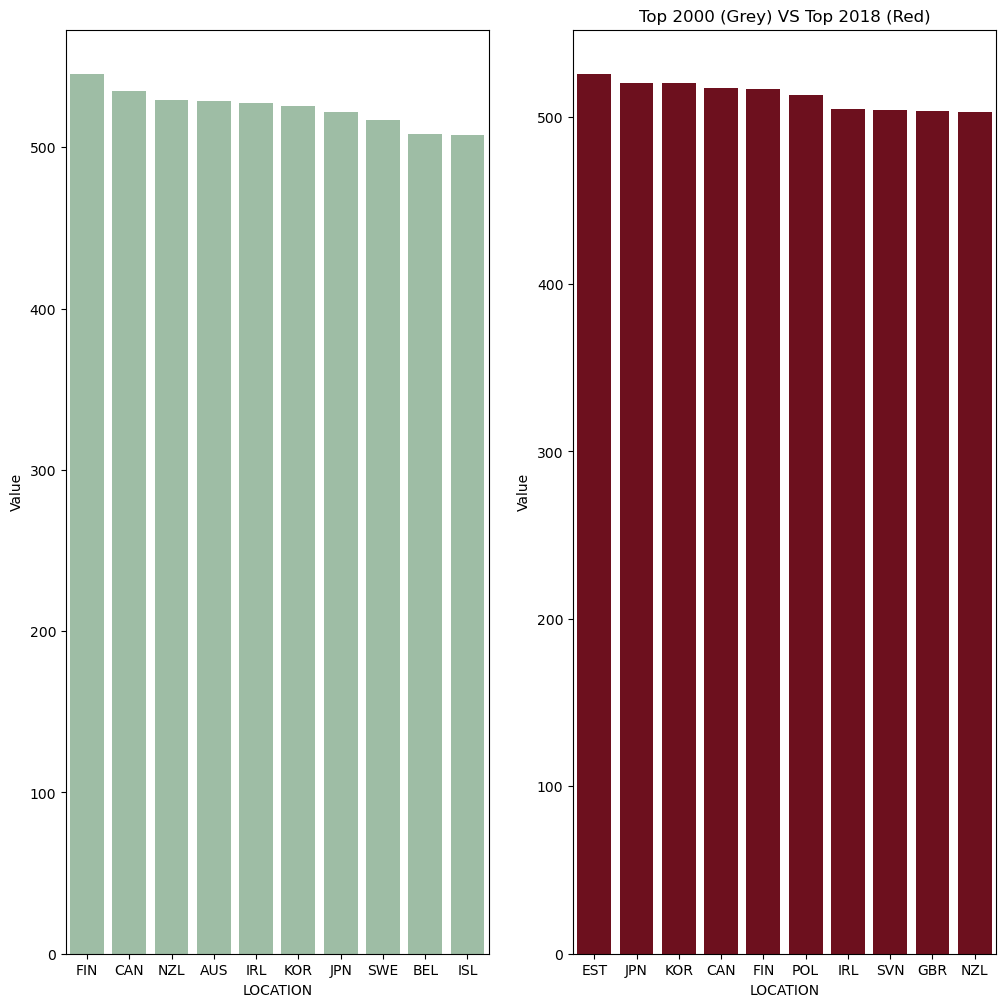

In [192]:
plt.figure(figsize = [12,12]);
plt.subplot(1,2,1);
sb.barplot(x='LOCATION', y='Value', data=top00.head(10), color='#99c2a2')
plt.subplot(1,2,2);
sb.barplot(x='LOCATION', y='Value', data=top18.head(10), color='#7d0013')
plt.title("Top 2000 (Grey) VS Top 2018 (Red)")
plt.show()

<b>BEST COUNTRY & GENDER IN MATH

In [189]:
math = pisa_df[pisa_df['INDICATOR'] == 'PISAMATH']

In [197]:
best_math = math.groupby(by=['LOCATION', 'SUBJECT']).agg({'Value' : 'mean'})

In [201]:
top_math = best_math.sort_values(by='Value', ascending=False).head(10)
top_math.reset_index(inplace=True)
top_math

,LOCATION,SUBJECT,Value
0,SGP,GIRL,564.000000
1,SGP,TOT,564.000000
2,SGP,BOY,564.000000
3,HKG,BOY,549.000000
4,HKG,TOT,548.000000
5,MAC,GIRL,548.000000
6,HKG,GIRL,547.000000
7,TWN,BOY,545.000000
8,MAC,TOT,544.000000
9,KOR,BOY,543.852333


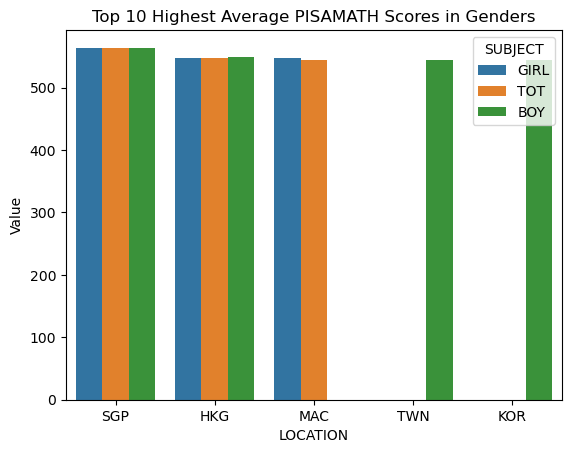

In [207]:
sb.barplot(x='LOCATION', y='Value', data=top_math, hue='SUBJECT')
plt.title("Highest Average PISAMATH Scores in Genders")
plt.show()

<b>DISTRIBUTION OF TEST SCORES

In [260]:
stats1 = pisa_df[pisa_df['INDICATOR'] == 'PISAMATH'].describe()
stats1

,index,TIME,Value
count,700.00000,700.000000,700.000000
mean,349.50000,2010.937143,486.895519
std,202.21688,5.082331,41.509145
min,0.00000,2003.000000,348.000000
25%,174.75000,2006.000000,478.000000
50%,349.50000,2012.000000,495.000000
75%,524.25000,2015.000000,513.000000
max,699.00000,2018.000000,564.000000


In [262]:
stats2 = pisa_df[pisa_df['INDICATOR'] == 'PISAREAD'].describe()
stats2

,index,TIME,Value
count,787.000000,787.000000,787.000000
mean,1093.000000,2009.617535,486.162590
std,227.331623,5.946954,37.303988
min,700.000000,2000.000000,358.000000
25%,896.500000,2006.000000,470.000000
50%,1093.000000,2009.000000,493.000000
75%,1289.500000,2015.000000,510.000000
max,1486.000000,2018.000000,574.000000


In [264]:
stats3 = pisa_df[pisa_df['INDICATOR'] == 'PISASCIENCE'].describe()
stats3

,index,TIME,Value
count,600.000000,600.000000,600.000000
mean,1786.500000,2012.240000,490.462725
std,173.349358,4.242924,36.776964
min,1487.000000,2006.000000,378.000000
25%,1636.750000,2009.000000,478.000000
50%,1786.500000,2012.000000,497.000000
75%,1936.250000,2015.000000,513.000000
max,2086.000000,2018.000000,565.000000


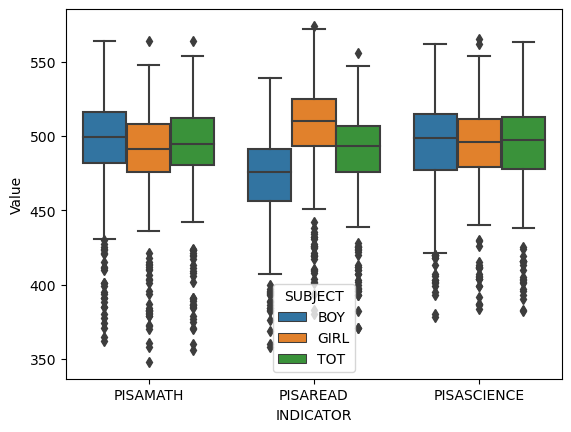

In [317]:
sb.boxplot(x= 'INDICATOR', y = 'Value', data=pisa_df, hue='SUBJECT');

<b>ΚΑΤΑΝΟΜΗ ΤΩΝ ΣΚΟΡ ΑΝΑ ΧΡΟΝΙΚΑ ΕΤΗ

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


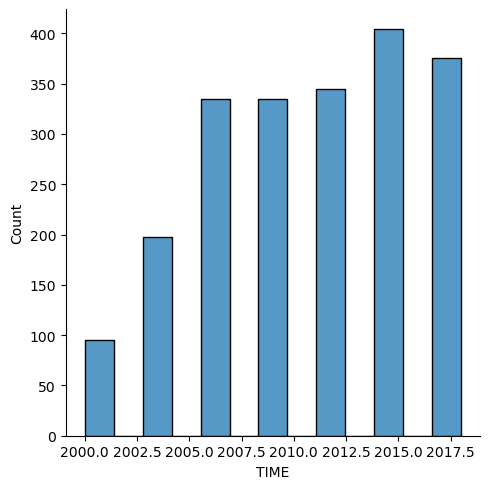

In [297]:
sb.displot(pisa_df.TIME)
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


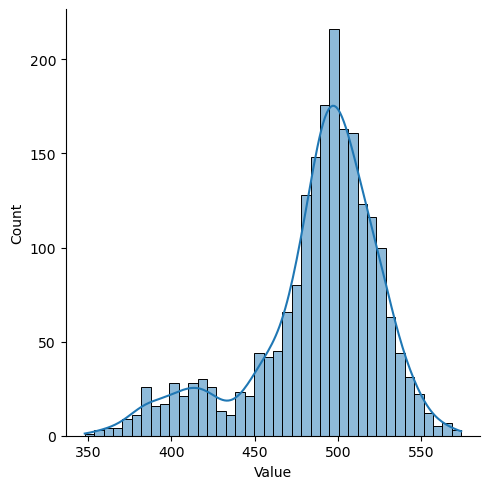

In [315]:
sb.displot(pisa_df.Value, kde=True)
plt.show()

In [439]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")

In [445]:
print(pisa_df.columns)

Index(['index', 'LOCATION', 'INDICATOR', 'SUBJECT', 'TIME', 'Value'], dtype='object')


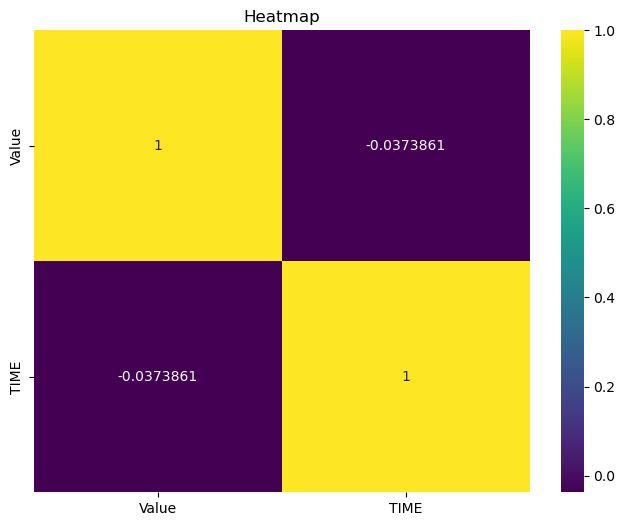

In [471]:
plt.figure(figsize=(8, 6))
sb.heatmap(pisa_df[['Value','TIME']].corr(), annot=True, cmap='viridis', fmt='g', cbar=True)
plt.title('Heatmap')
plt.show()

<b>ΑΝΑΛΥΣΗ ΠΑΛΙΝΔΡΟΜΗΣΗΣ-LINEAR REGRESSION OF TIME & VALUE

In [69]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")
pisa_df=pisa_df[['TIME','Value']]
pisa_df

,TIME,Value
0,2003,527.000
1,2006,527.000
2,2009,519.000
3,2012,510.115
4,2015,497.000
...,...,...
2082,2018,420.000
2083,2018,411.000
2084,2018,482.000
2085,2018,479.000


In [71]:
X = pisa_df['TIME']
Y = pisa_df['Value']

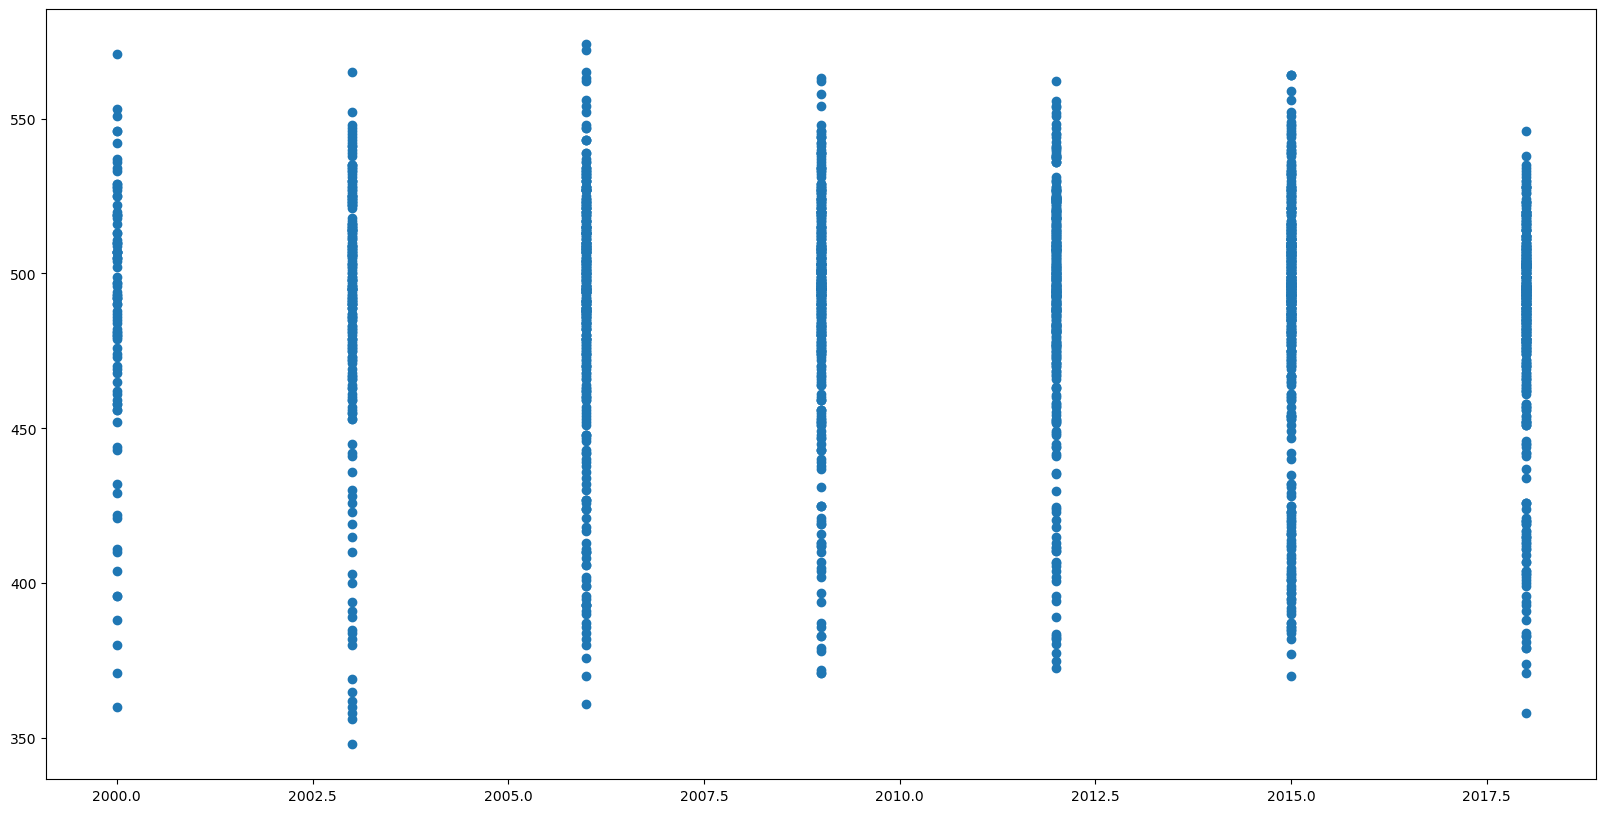

In [73]:
plt.figure(figsize = [20,10]);
plt.scatter(X,Y)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=23)

In [77]:
X_train = np.array(X_train).reshape(-1,1)

In [79]:
X_test = np.array(X_test).reshape(-1,1)

In [81]:
lr = LinearRegression() #model

In [83]:
lr.fit(X_train, Y_train)

LinearRegression()

In [85]:
c = lr.intercept_
c

1322.9287294928272

In [87]:
m = lr.coef_
m

array([-0.41535806])

In [89]:
Y_pred_train = m*X_train + c
Y_pred_train.flatten()

array([489.72045319, 484.73615642, 485.98223061, ..., 490.96652738,
       489.72045319, 490.96652738])

In [91]:
Y_pred_train1 = lr.predict(X_train)
Y_pred_train1

array([489.72045319, 484.73615642, 485.98223061, ..., 490.96652738,
       489.72045319, 490.96652738])

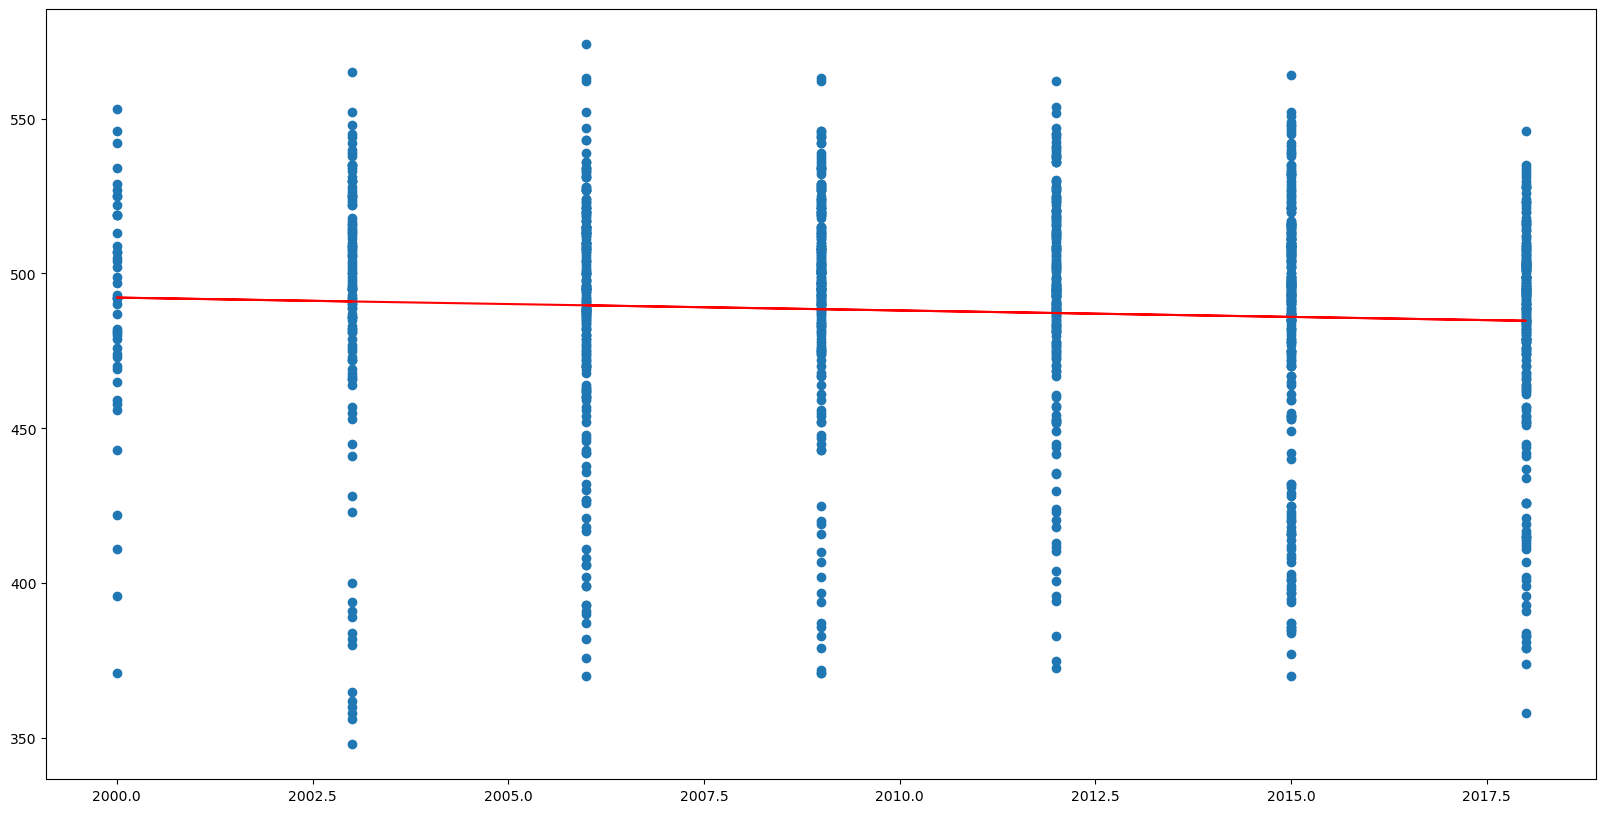

In [93]:
plt.figure(figsize = [20,10]);
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train1, color='red')

ΤΣΕΚΑΡΩ ΑΝ ΔΟΥΛΕΥΕΙ ΚΑΙ ΜΕ ΤΑ ΔΕΔΟΜΕΝΑ ΠΟΥ ΤΟΥ ΕΔΩΣΑ ΓΙΑ ΤΕΣΤΙΝΓΚ

In [95]:
Y_pred_test1 = lr.predict(X_test)
Y_pred_test1

array([484.73615642, 484.73615642, 485.98223061, 484.73615642,
       487.2283048 , 490.96652738, 487.2283048 , 484.73615642,
       488.474379  , 485.98223061, 492.21260157, 489.72045319,
       489.72045319, 487.2283048 , 490.96652738, 487.2283048 ,
       490.96652738, 492.21260157, 487.2283048 , 488.474379  ,
       487.2283048 , 485.98223061, 489.72045319, 488.474379  ,
       484.73615642, 484.73615642, 487.2283048 , 487.2283048 ,
       488.474379  , 487.2283048 , 484.73615642, 485.98223061,
       485.98223061, 490.96652738, 489.72045319, 484.73615642,
       484.73615642, 487.2283048 , 489.72045319, 484.73615642,
       487.2283048 , 487.2283048 , 487.2283048 , 485.98223061,
       490.96652738, 488.474379  , 485.98223061, 492.21260157,
       485.98223061, 485.98223061, 490.96652738, 487.2283048 ,
       485.98223061, 490.96652738, 485.98223061, 488.474379  ,
       484.73615642, 488.474379  , 489.72045319, 485.98223061,
       490.96652738, 488.474379  , 484.73615642, 488.47

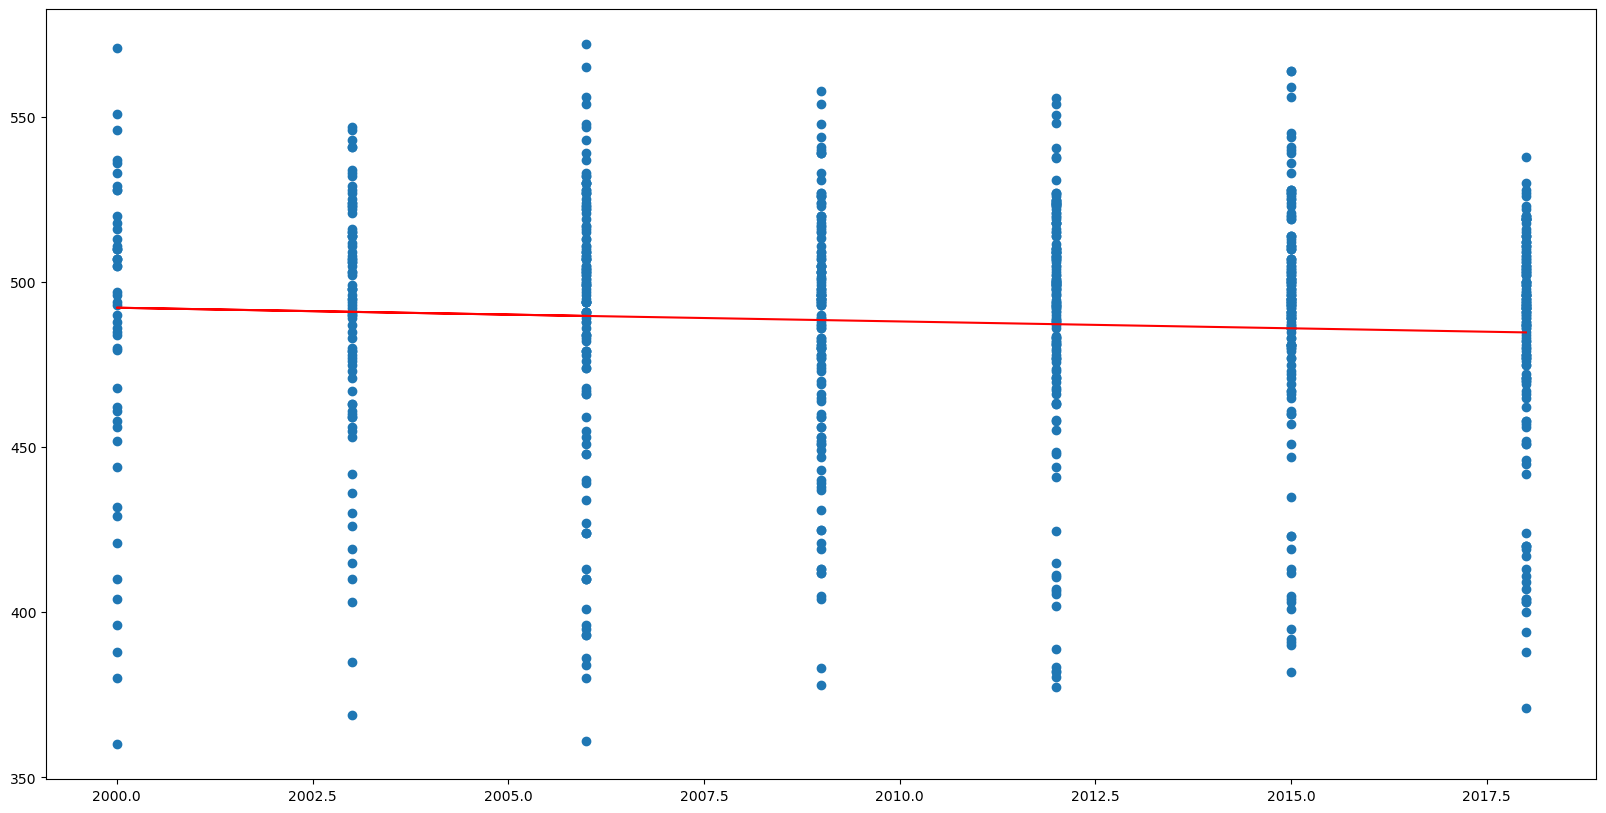

In [97]:
plt.figure(figsize = [20,10]);
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred_test1, color='red')

In [99]:
## Make predictions on the test set
y_pred = lr.predict(X_test)

In [103]:
## Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [105]:
## Print evaluation metrics
print("\n11. Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


11. Model Evaluation:
Mean Absolute Error (MAE): 28.164082151202095
Mean Squared Error (MSE): 1434.9865065646225
R-squared (R2): -0.0023407759798435013


<b>ANOVA-ΑΝΑΛΥΣΗ ΔΙΑΚΥΜΑΝΣΗΣ

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")

In [11]:
pisa_df.head

<bound method NDFrame.head of       index LOCATION    INDICATOR SUBJECT  TIME    Value
0         0      AUS     PISAMATH     BOY  2003  527.000
1         1      AUS     PISAMATH     BOY  2006  527.000
2         2      AUS     PISAMATH     BOY  2009  519.000
3         3      AUS     PISAMATH     BOY  2012  510.115
4         4      AUS     PISAMATH     BOY  2015  497.000
...     ...      ...          ...     ...   ...      ...
2082   2082      CRI  PISASCIENCE     BOY  2018  420.000
2083   2083      CRI  PISASCIENCE    GIRL  2018  411.000
2084   2084      LTU  PISASCIENCE     TOT  2018  482.000
2085   2085      LTU  PISASCIENCE     BOY  2018  479.000
2086   2086      LTU  PISASCIENCE    GIRL  2018  485.000

[2087 rows x 6 columns]>

Text(0.5, 1.0, 'Boxplot of Countries and Scores of Genders')

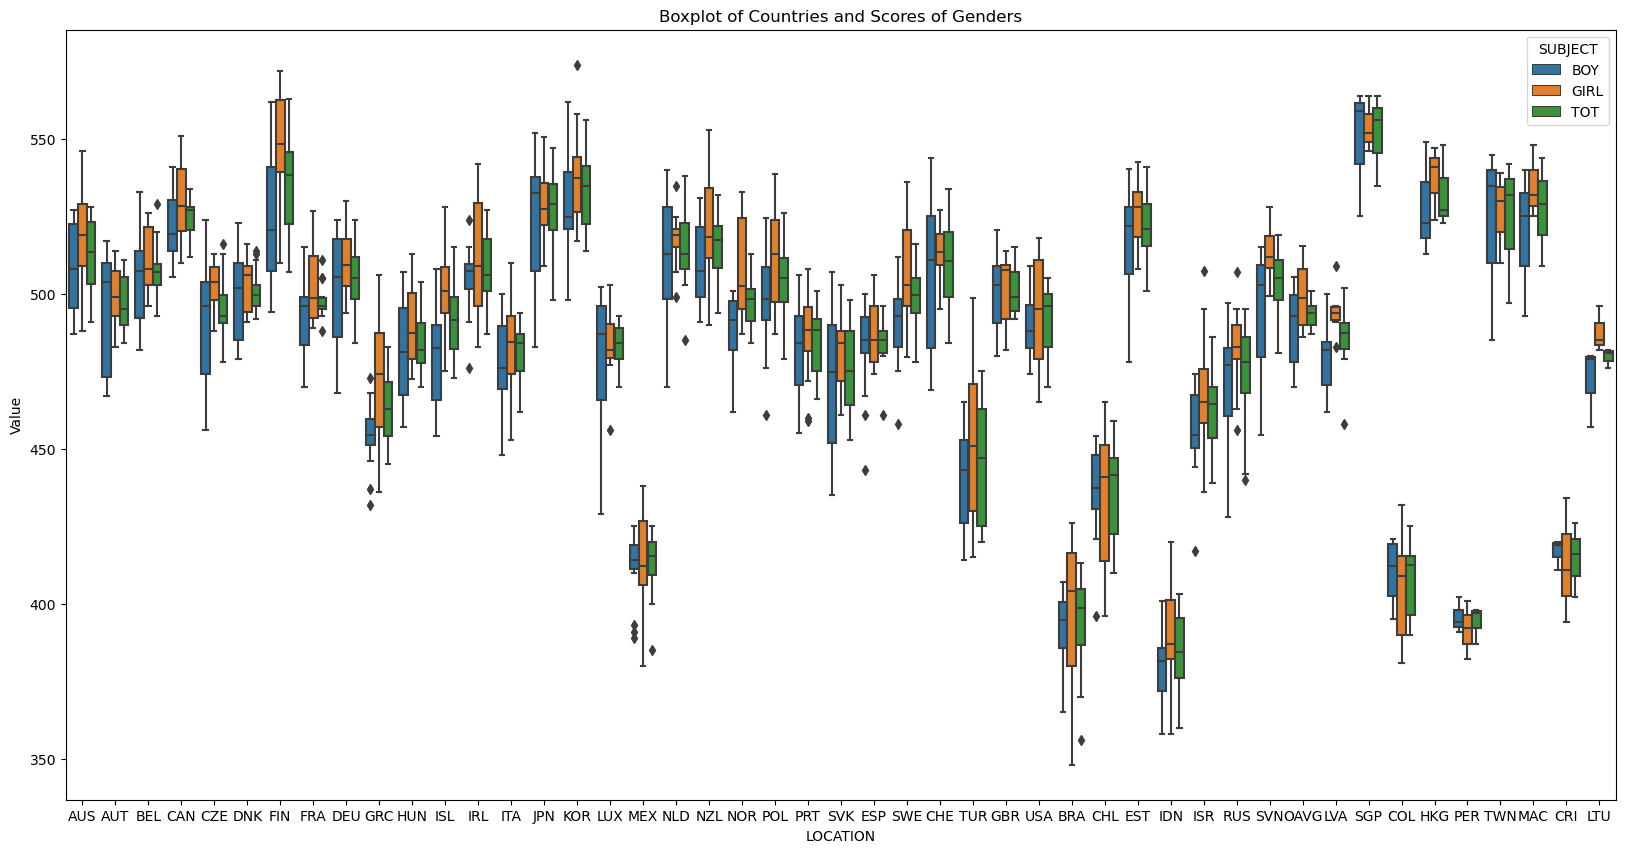

In [29]:
plt.figure(figsize = [20,10]);
sb.boxplot(y='Value', x='LOCATION', data=pisa_df, hue='SUBJECT')
plt.title('Boxplot of Countries and Scores of Genders')

In [33]:
from scipy import stats

In [43]:
cnts = pd.unique(pisa_df.LOCATION.values)
l_pisa = [pisa_df['Value'][pisa_df.LOCATION == cnt] for cnt in cnts]
f, p = stats.f_oneway(*l_pisa)

In [45]:
f, p

(272.7298359364653, 0.0)

Text(0.5, 1.0, 'Boxplot of Countries and Scores of Math, Reading & Science')

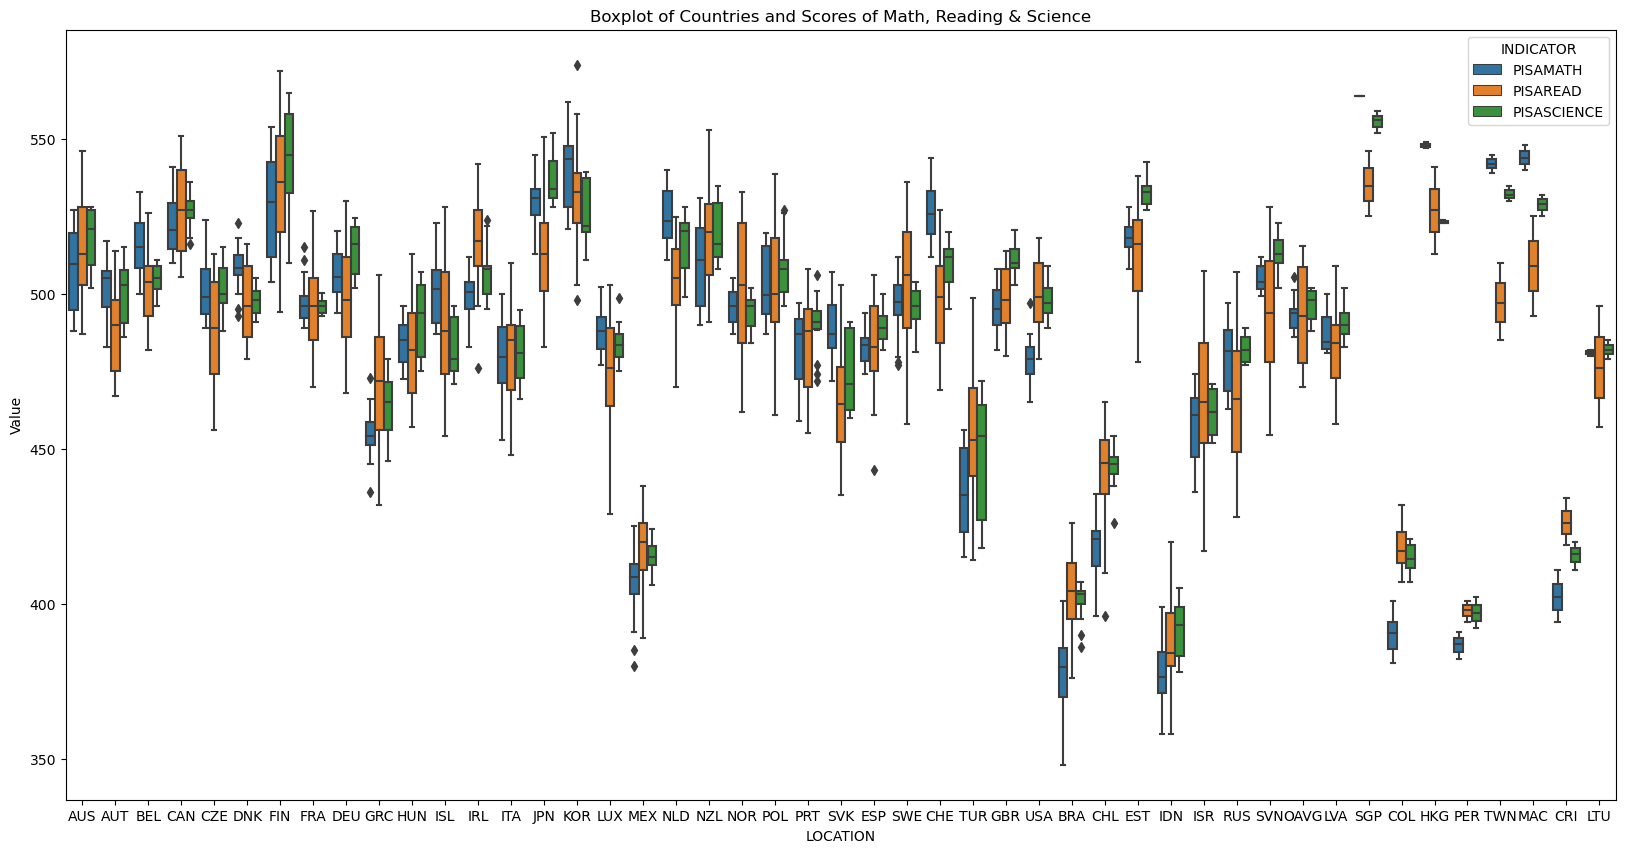

In [31]:
plt.figure(figsize = [20,10]);
sb.boxplot(y='Value', x='LOCATION', data=pisa_df, hue='INDICATOR')
plt.title('Boxplot of Countries and Scores of Math, Reading & Science')

<b>LINEAR REGRESSION OF Value W/ GENDER

In [68]:
pisa2= pd.read_csv('PISA2.csv', encoding = "ISO-8859-1")

In [70]:
pisa2

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,1,1,2003,527.000
1,1,AUS,1,1,2006,527.000
2,2,AUS,1,1,2009,519.000
3,3,AUS,1,1,2012,510.115
4,4,AUS,1,1,2015,497.000
...,...,...,...,...,...,...
2082,2082,CRI,3,1,2018,420.000
2083,2083,CRI,3,2,2018,411.000
2084,2084,LTU,3,3,2018,482.000
2085,2085,LTU,3,1,2018,479.000


In [190]:
pisa2_lim=pisa2[['SUBJECT','Value']]

In [192]:
pisa2_lim

,SUBJECT,Value
0,1,527.000
1,1,527.000
2,1,519.000
3,1,510.115
4,1,497.000
...,...,...
2082,1,420.000
2083,2,411.000
2084,3,482.000
2085,1,479.000


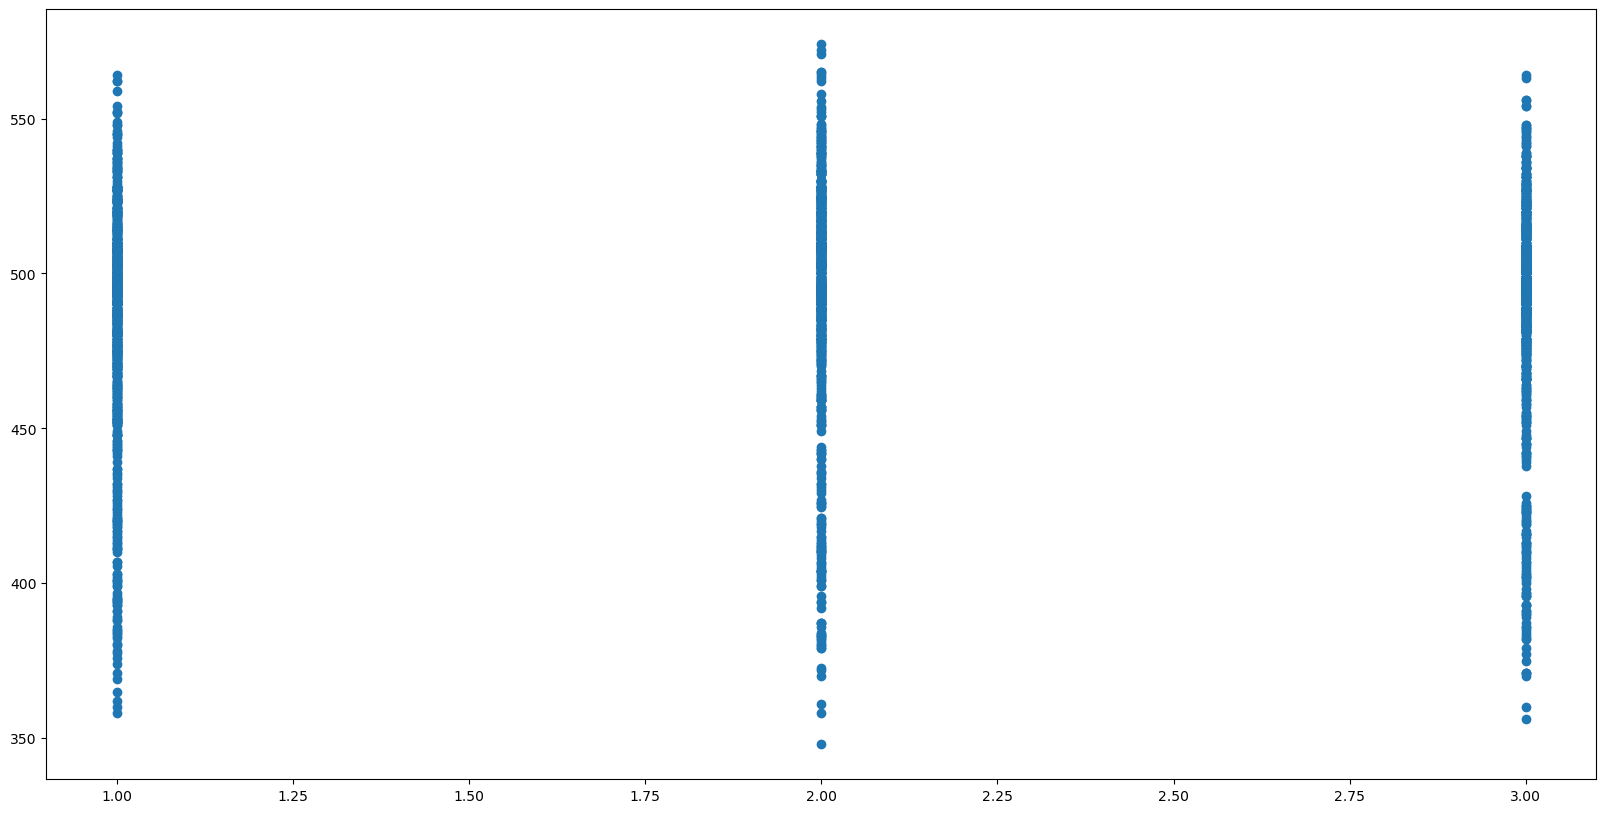

In [194]:
X = pisa2_lim['SUBJECT']
Y = pisa2_lim['Value']

plt.figure(figsize = [20,10]);
plt.scatter(X,Y)

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=23)

In [198]:
X_train = np.array(X_train).reshape(-1,1)

In [200]:
X_test = np.array(X_test).reshape(-1,1)

In [202]:
lr = LinearRegression() #model

In [204]:
lr.fit(X_train, Y_train)

LinearRegression()

In [206]:
c = lr.intercept_
m = lr.coef_
c, m

(486.5245872956582, array([0.56562876]))

In [208]:
Y_pred_train = m*X_train + c
Y_pred_train.flatten()

array([487.09021605, 487.09021605, 488.22147357, ..., 487.65584481,
       487.09021605, 488.22147357])

In [210]:
Y_pred_train1 = lr.predict(X_train)
Y_pred_train1

array([487.09021605, 487.09021605, 488.22147357, ..., 487.65584481,
       487.09021605, 488.22147357])

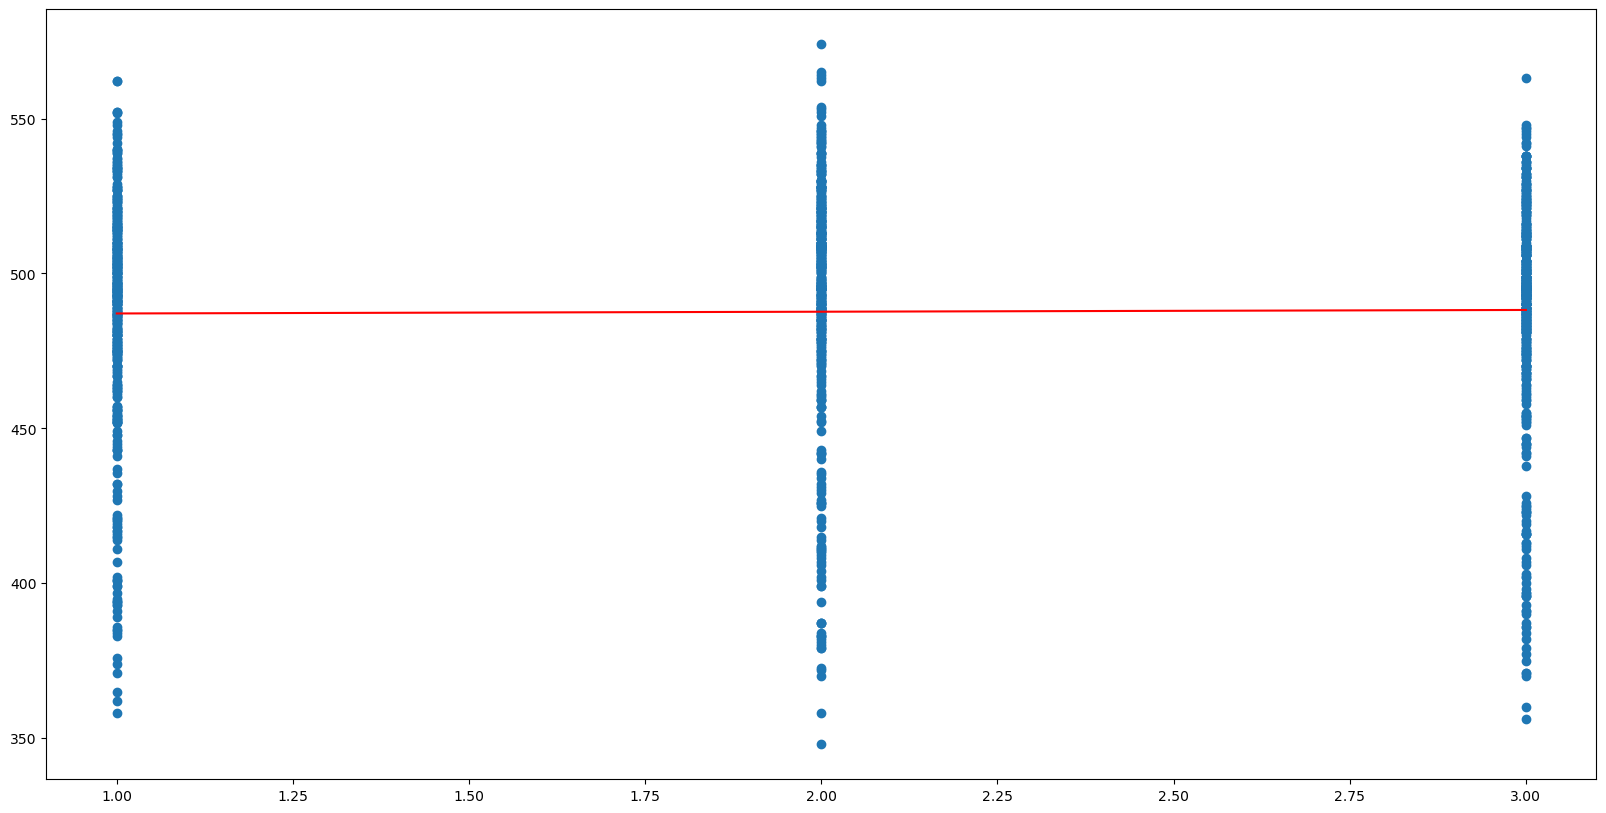

In [212]:
plt.figure(figsize = [20,10]);
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train1, color='red')

In [214]:
## Make predictions on the test set
y_pred = lr.predict(X_test)

In [216]:
## Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [218]:
## Print evaluation metrics
print("\n11. Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


11. Model Evaluation:
Mean Absolute Error (MAE): 28.059876499544465
Mean Squared Error (MSE): 1428.3622005304455
R-squared (R2): 0.002286314254280497


<b>LINEAR REGRESSION OF INDICATOR-VALUE

In [162]:
pisa2_lim=pisa2[['INDICATOR','Value']]

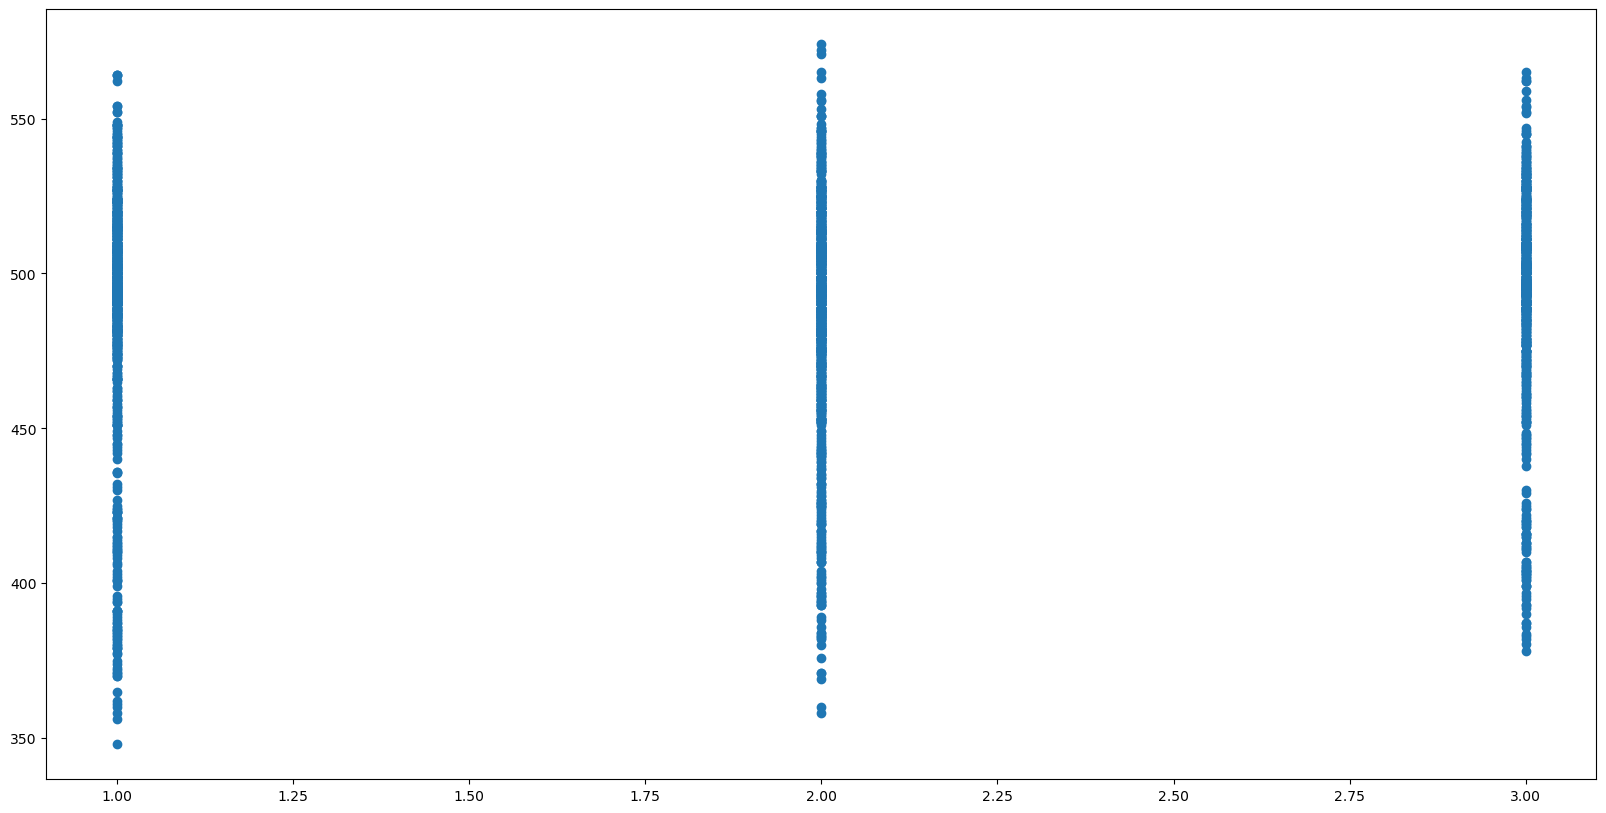

In [163]:
X = pisa2_lim['INDICATOR']
Y = pisa2_lim['Value']

plt.figure(figsize = [20,10]);
plt.scatter(X,Y)

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=23)

In [168]:
X_train = np.array(X_train).reshape(-1,1)

In [170]:
X_test = np.array(X_test).reshape(-1,1)

In [172]:
lr = LinearRegression() #model

In [174]:
lr.fit(X_train, Y_train)

LinearRegression()

In [176]:
c = lr.intercept_
m = lr.coef_
c, m

(481.4803513880831, array([3.18047194]))

In [178]:
Y_pred_train = m*X_train + c
Y_pred_train.flatten()

array([491.02176721, 484.66082333, 487.84129527, ..., 487.84129527,
       487.84129527, 484.66082333])

In [180]:
Y_pred_train1 = lr.predict(X_train)
Y_pred_train1

array([491.02176721, 484.66082333, 487.84129527, ..., 487.84129527,
       487.84129527, 484.66082333])

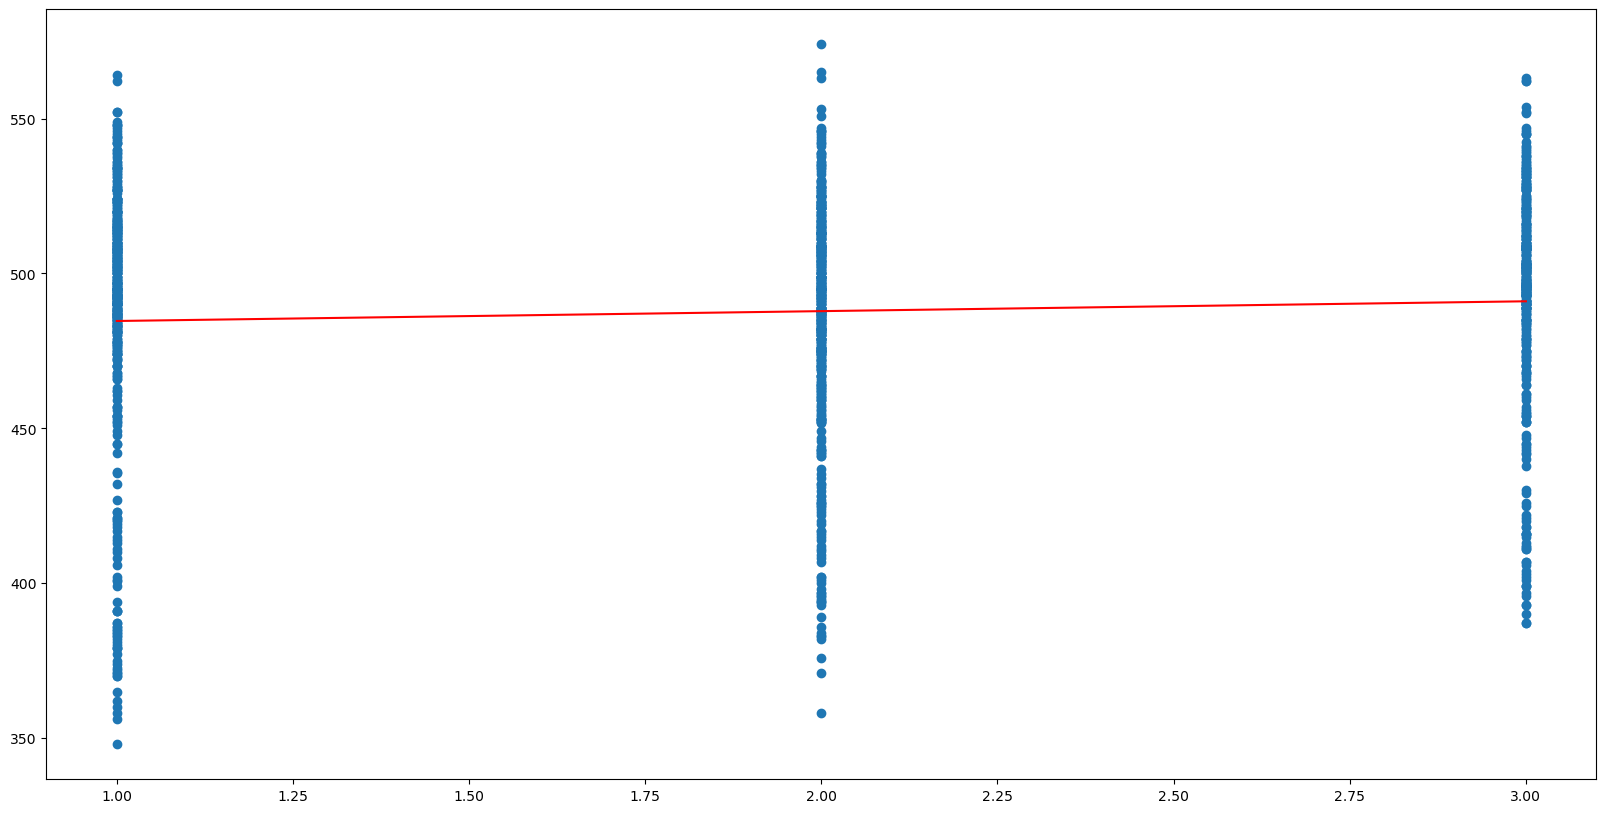

In [182]:
plt.figure(figsize = [20,10]);
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train1, color='red')

In [184]:
## Make predictions on the test set
y_pred = lr.predict(X_test)

In [186]:
## Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [188]:
## Print evaluation metrics
print("\n11. Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


11. Model Evaluation:
Mean Absolute Error (MAE): 28.231201764820565
Mean Squared Error (MSE): 1440.0489330516396
R-squared (R2): -0.00587689041027506


<b>LOGISTIC REGRESSION of X=value & Y=INDICATOR

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import roc_curve, auc

In [82]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")

In [84]:
X = pisa_df[['Value']]
y = pisa_df[['INDICATOR']]

In [86]:
pd.get_dummies(y, dtype=float)

,INDICATOR_PISAMATH,INDICATOR_PISAREAD,INDICATOR_PISASCIENCE
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2082,0.0,0.0,1.0
2083,0.0,0.0,1.0
2084,0.0,0.0,1.0
2085,0.0,0.0,1.0


In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [90]:
log_regression = LogisticRegression()

In [130]:
Z = log_regression.fit(X_train,y_train)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
Z

LogisticRegression()

In [134]:
y_pred = Z.predict(X_test)

In [102]:
#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0, 216,   0],
       [  0, 230,   0],
       [  0, 181,   0]])

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3668261562998405


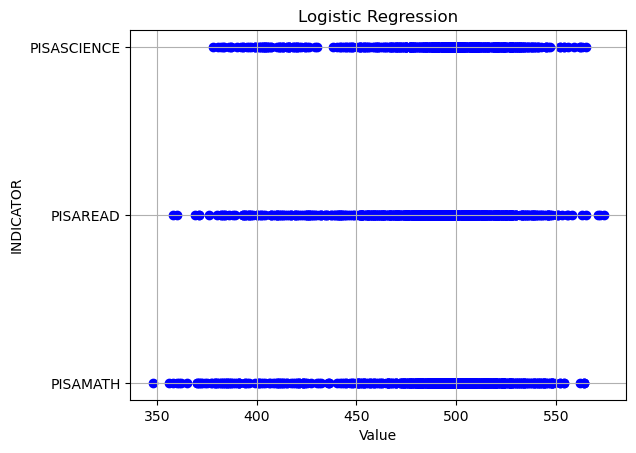

In [116]:
# Plot the logistic regression curve
plt.scatter(pisa_df['Value'], pisa_df['INDICATOR'], color='blue', label='Data Points')
plt.xlabel('Value')
plt.ylabel('INDICATOR')
plt.title('Logistic Regression')
plt.grid(True)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


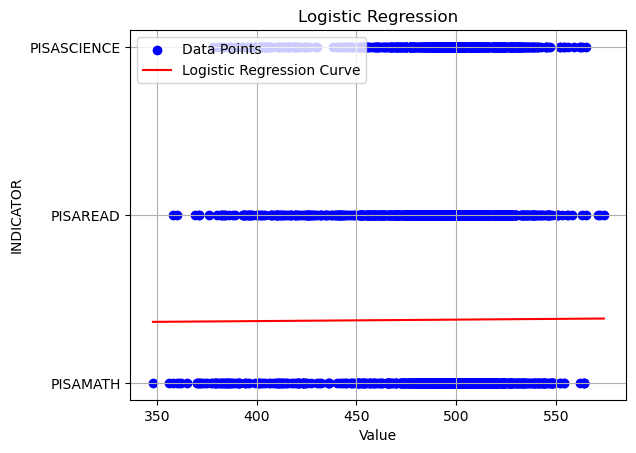

In [160]:
# Extracting features and target variable
X = pisa_df[['Value']]  # Features (independent variable)
y = pisa_df['INDICATOR']  # Target variable (dependent variable)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the logistic regression curve
x_values = np.linspace(pisa_df['Value'].min(), pisa_df['Value'].max(), 500).reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]  # Probabilities of the positive class

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Logistic Regression Curve')
plt.xlabel('Value')
plt.ylabel('INDICATOR')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


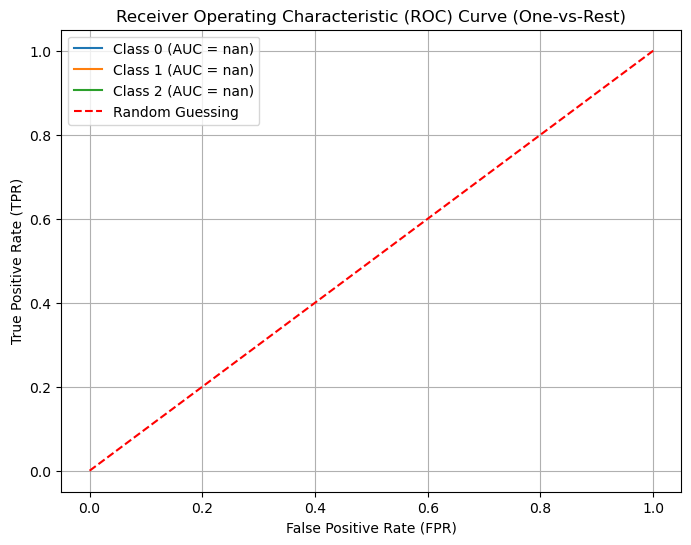

In [174]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model called 'model'
# Make sure you've already trained the model as shown in the previous example

# Predict probabilities for each class
y_probs = model.predict_proba(X)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(model.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(model.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


In [168]:
# Make probability predictions for the positive class
y_prob_logistic = log_regression.predict_proba(X_test)[:, 1]

In [170]:
# Compute ROC curve and ROC area
#https://stackoverflow.com/questions/61114520/how-to-fix-valueerror-multiclass-format-is-not-supported
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic, pos_label=1)
roc_auc = auc(fpr, tpr)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


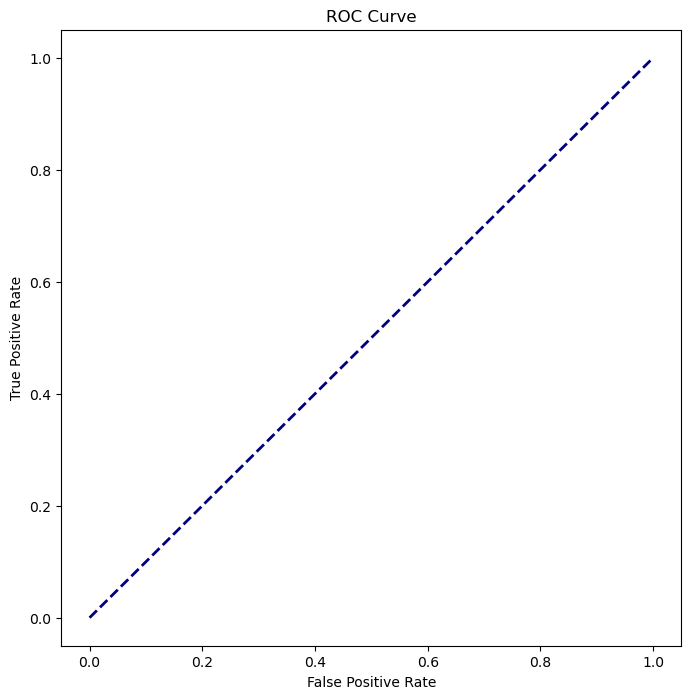

In [171]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<b>K-MEANS INDICATOR & VALUE

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [40]:
df = pd.read_csv('PISA2.csv')

In [42]:
selected_features = ['INDICATOR', 'Value']
X = df[selected_features]

In [44]:
# Standardize the features (optional but often recommended for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
k = 2

In [48]:
# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

In [50]:
# Fit the model to the standardized data
kmeans.fit(X_scaled)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [52]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

IndexError: index 2 is out of bounds for axis 1 with size 2

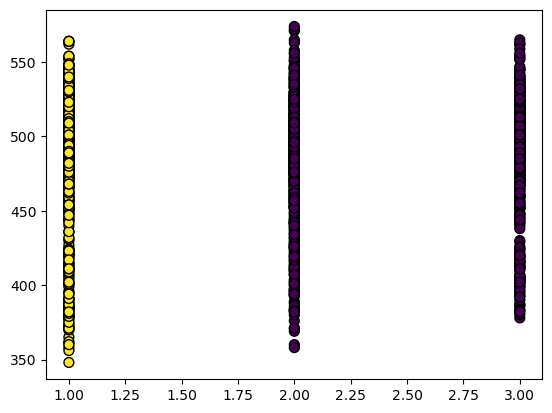

In [54]:
# Visualize the clusters
plt.scatter(X['INDICATOR'], X['Value'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of PISA Results')
plt.legend()
plt.show()

<b>PCA

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('PISA2.csv')

In [12]:
selected_features = ['INDICATOR','SUBJECT']
X = df[selected_features]

In [16]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
pca = PCA(n_components=2)

In [20]:
principal_components = pca.fit_transform(X_scaled)

In [22]:
# Creating a DataFrame with the principal components and add it to the original DataFrame
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df = pd.concat([df, pc_df], axis=1)

In [24]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.50022947 0.49977053]


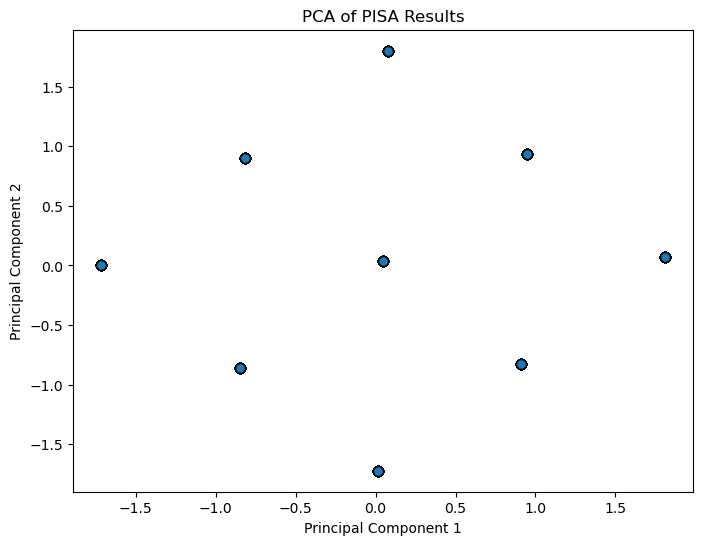

In [29]:
# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], edgecolor='k', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of PISA Results')
plt.show()

In [ ]:
#3D

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


<b>AUTOREGRESSION MODEL FOR FORECASTING

In [ ]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

In [ ]:
pisa_df = pd.read_csv('PISA_data.csv')

In [ ]:
pisa_df=pisa_df[['TIME', 'Value']]

In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(pisa_df) * 0.8)
train, test = pisa_df.iloc[:train_size], pisa_df.iloc[train_size:]

In [ ]:
#autoregressive model (AR)
model = sm.tsa.ar_model.AutoReg(train['Value'], lags=30)
ar_model = model.fit()

In [142]:
# Make predictions on the test set
predictions = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)

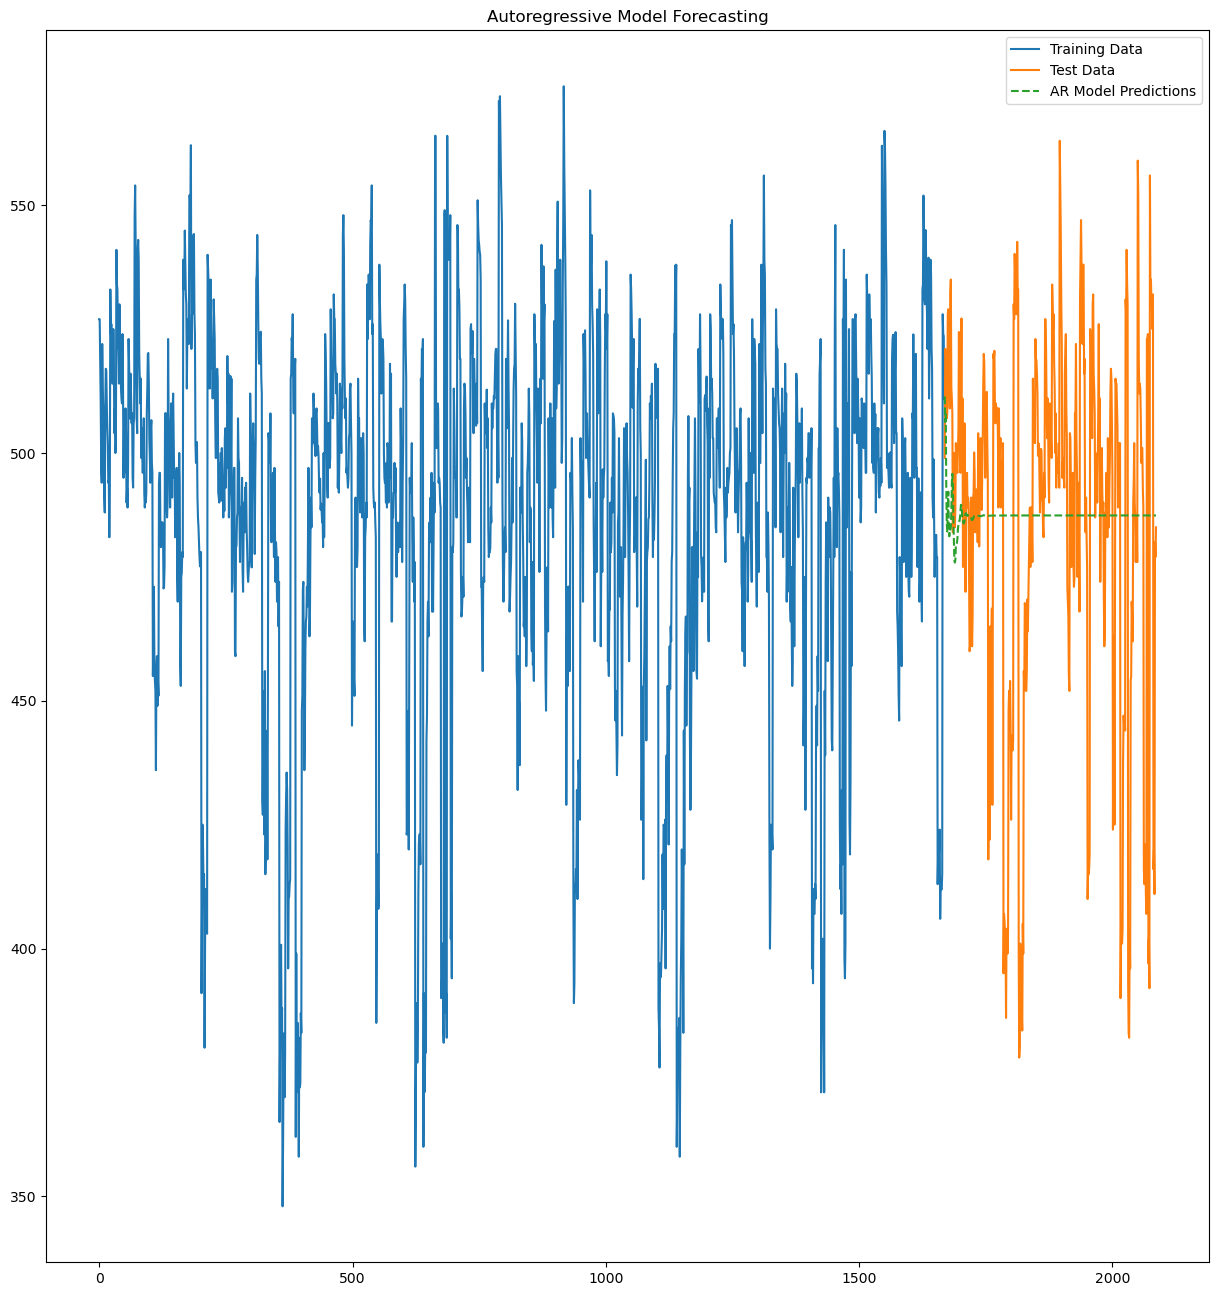

In [144]:
# Plot the results
plt.figure(figsize=(15, 16))
plt.plot(train['Value'], label='Training Data')
plt.plot(test['Value'], label='Test Data')
plt.plot(predictions, label='AR Model Predictions', linestyle='--')
plt.title('Autoregressive Model Forecasting')
plt.legend()
plt.show()

In [42]:
# Import necessary libraries
import pandas as pd
import statsmodels as sm

# Load your dataset
data = pd.read_csv("PISA_data.csv")

# Extract TIME and Value columns
time_data = data["TIME"]
value_data = data["Value"]

# Check for missing values and handle them if needed
if data.isnull().values.any():
    print("Warning: Missing values found!")
    # Handle missing values using appropriate methods (e.g., imputation, deletion)

# Convert TIME column to datetime object (if needed)
# Assuming TIME is in a format suitable for conversion
time_data = pd.to_datetime(time_data)

# Define model parameters (adjust based on your data)
p = 2  # number of autoregressive terms
q = 1  # number of integrated terms
d = 0  # number of differencing terms (usually determined by checking stationarity)

# Create  model
model = sm.tsa.ar_model.AutoReg(value_data, lags=30)

# Fit the model
fitted_model = model.fit()

# Define number of steps to predict
n_steps = 10  # predict 10 future values

# Predict future values
predicted_values = fitted_model.forecast(steps=n_steps)

# Print predicted values
print("Predicted future values:")
print(predicted_values)

Predicted future values:
2087    467.829169
2088    483.746376
2089    475.045970
2090    478.656764
2091    471.189739
2092    480.566452
2093    489.651532
2094    500.113702
2095    490.655597
2096    479.653757
dtype: float64


<b>ATTEMPTS

In [4]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 2.5 MB/s eta 0:00:00.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
from folium import plugins

In [33]:
dataset = pd.read_csv("PISA_data.csv")

In [35]:
dataset = dataset['LOCATION']

In [117]:
#map = folium.Map(location=[dataset.mean(), dataset.mean()], zoom_start=14, control_scale=True)

In [119]:
#m.save("footprint.html")

In [121]:
pip install HiPart

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for HiPart from https://files.pythonhosted.org/packages/73/23/196f4f4657749510dc19a4d0ba2e8a4cc1af36514fe914a315b084c3c30f/HiPart-1.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for treelib>=1.6 from https://files.pythonhosted.org/packages/74/93/0944bb5ade972a5ef2dd9211a20730081ed2833024239171807d7a9bd4b0/treelib-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for kdepy from https://files.pythonhosted.org/packages/51/11/88e52b9dec1047950312c654cc942b3c53763509c3b8575db58a94e77a64/KDEpy-1.1.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for dash>=2.0 from https://files.pythonhosted.org/packages/7b/62/438626ab498869249e99376684ba6d88931e7c2dd86d03a92d9d7a9b4c54/dash-2.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for ansi2h

TREE-MAKING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your PISA results dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('your_dataset.csv')

# Assuming you have a target variable 'TargetVariable' that you want to predict
# Replace 'TargetVariable' with the actual column name you want to predict
target_variable = 'TargetVariable'

# Encode categorical target variable if needed
le = LabelEncoder()
df[target_variable] = le.fit_transform(df[target_variable])

# Select features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# ERROR HERE!!!!
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


<b>dePDDP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from HiPart.clustering import DePDDP, IPDDP, KMPDDP, PDDP, BisectingKmeans
from HiPart import visualizations as hvs

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_linnerud
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [9]:
dataset = pd.read_csv("PISA_data.csv")

In [20]:
X = dataset['Value']

In [24]:
pca = PCA(n_components=2)
x_pr = pca.fit_transform(X)

plt.scatter(x_pr[:,0], x_pr[:,1], c="red", alpha=0.5)
plt.title('True Labels')

ValueError: Expected 2D array, got 1D array instead:
array=[527. 527. 519. ... 482. 479. 485.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
clustered_class = DePDDP(max_clusters_number=5, bandwidth_scale=0.5, percentile=0.2, min_sample_split=5)

clu_res = clustered_class.fit(X)
m = hvs.split_visualization(clu_res)

2nd attempt of log. regression

In [37]:
import pandas as pd
import statsmodels.api as sm

In [39]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('PISA_data.csv')

In [41]:
# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['SUBJECT', 'INDICATOR'], drop_first=True)

# Define the target variable (dependent variable) and the independent variables
target_variable = 'INDICATOR'
independent_variables = df.columns[df.columns != target_variable]

# Add a constant to the independent variables for the logistic regression model
X = sm.add_constant(df[independent_variables])

# Define the logistic regression model
logit_model = sm.Logit(df[target_variable], X)

# Fit the model
result = logit_model.fit()

# Display the summary of the logistic regression
print(result.summary())

KeyError: 'INDICATOR'

2nd attempt of dePDDP

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min

def local_density(X, cutoff_distance):
    distance_matrix = pairwise_distances_argmin_min(X, X)[1]
    density = np.sum(np.exp(-np.square(distance_matrix) / (2 * cutoff_distance**2)), axis=0)
    return density

def dePDDP(X, cutoff_distance, rho_threshold, delta_threshold):
    # Step 1: Compute local density
    density = local_density(X, cutoff_distance)

    # Step 2: Compute delta (minimum distance to points with higher density)
    distance_matrix = pairwise_distances_argmin_min(X, X)[1]
    delta = np.min(distance_matrix[:, density.argsort()[::-1][:density.size-1]], axis=1)

    # Step 3: Identify cluster centers (peaks) based on density and delta
    peaks_indices = np.where((density >= rho_threshold) & (delta >= delta_threshold))[0]

    # Step 4: Assign points to clusters
    labels = np.zeros(X.shape[0], dtype=int)
    for i, peak_index in enumerate(peaks_indices):
        labels[peak_index] = i + 1  # Cluster labels start from 1

    # Step 5: Assign non-peaks to the nearest cluster
    non_peaks_indices = np.where(labels == 0)[0]
    for non_peak_index in non_peaks_indices:
        labels[non_peak_index] = np.argmin(distance_matrix[non_peak_index, peaks_indices]) + 1

    return labels

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('PISA_data.csv')

# Choose the columns for analysis (adjust as needed)
columns_of_interest = ['SUBJECT', 'INDICATOR']

# Convert categorical columns to numerical using one-hot encoding
df_one_hot = pd.get_dummies(df[columns_of_interest])

# Combine one-hot encoded columns with the original DataFrame
df = pd.concat([df, df_one_hot], axis=1)

# Select features for clustering
X = df[df_one_hot.columns].values

# Set algorithm parameters (adjust as needed)
cutoff_distance = 1.0
rho_threshold = 10.0
delta_threshold = 1.0

# Apply dePDDP algorithm
cluster_labels = dePDDP(X, cutoff_distance, rho_threshold, delta_threshold)

# Add cluster labels to the original DataFrame
df['CLUSTER_LABEL'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(df)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed